# package_LAB2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import SelectPath_RT,Delay_RT

import package_LAB2
from package_LAB2 import SelectPath_RT,Delay_RT,Leadlag,PID_RT

from importlib import reload
package_DBR=reload(package_DBR)
package_LAB2=reload(package_LAB2)

## Leadlag()

In [23]:
help(Leadlag)

Help on function Leadlag in module package_LAB2:

Leadlag(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "Leadlag" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag:lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0, 100)

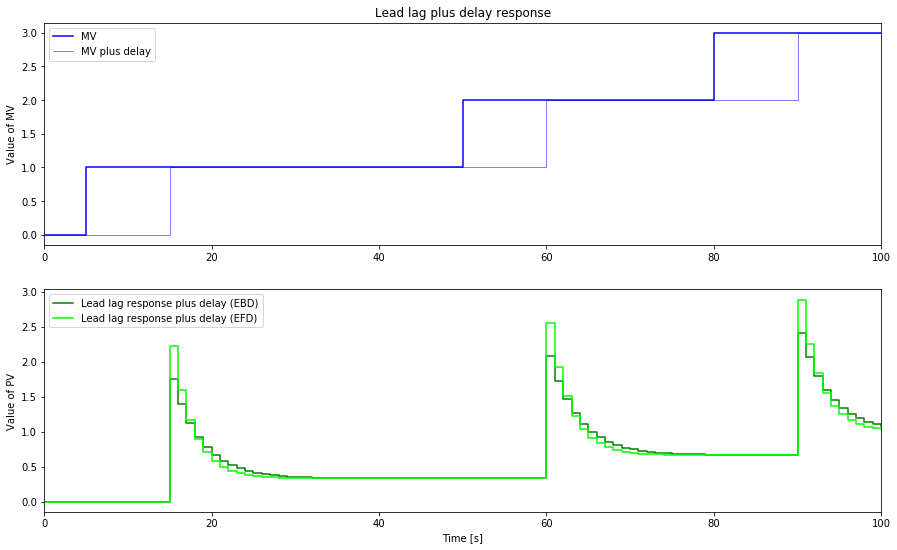

In [24]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 20
Tlag=3
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    Leadlag(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)
    Leadlag(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    #Leadlag(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead lag plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead lag response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead lag response plus delay (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

## PID_RT

In [25]:
help(PID_RT)

Help on function PID_RT in module package_LAB2:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='TRAP-TRAP')
    "
    The function "PID_RT3 needs to be included in a "for or while loop"
    
    :SP: SP (or SetPOint) vector
    :PV: PV (or Process Value) vector
    :Man: Man (or Manual controller mode) vector (True or False)
    :MVMan: MVMan (or Manual value for MV) vector
    :MVFF: MVFF (or Feedforward) vector
    
    :KC: controller gain
    :Ti: integral time constant [s]
    :Td: Derivative time constant [s]
    :alpha: Tfd=alpha*Td where Thd is the derivative filter time constant[s]
    :Ts: sampling period [s]
    
    :MVMin: minimum value for MV (used for saturation and anti wind-up)
    :MVMax: maximum value for MV (used for saturation and anti wind-up)
    
    :MV: MV (or Manipulated Value) vector
    :MVP: MVP (or Proportional part of MV) vector
    :MVI: MVI (or Integral part of MV) vector
    :

(0, 50)

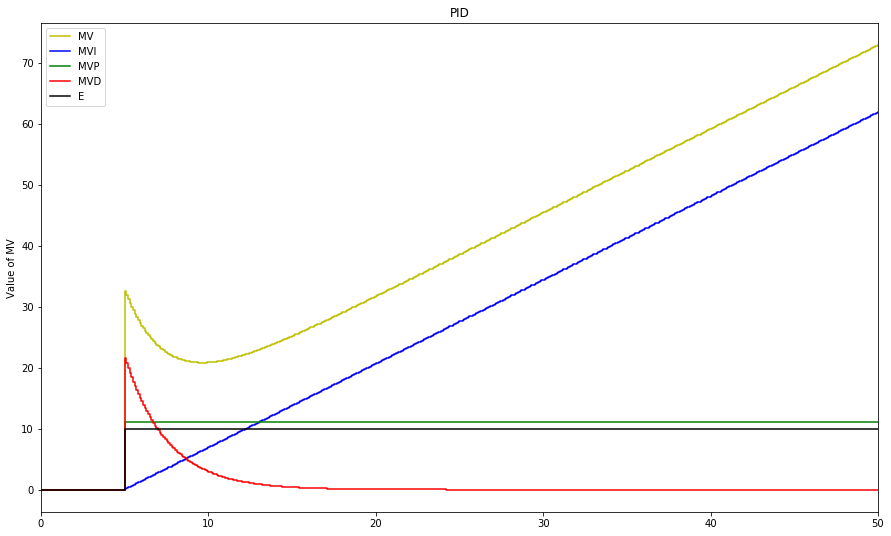

In [26]:
TSim = 50
Ts = 0.1
N = int(TSim/Ts) + 1


t= []
SP = []
PV=[]
MV=[]
E=[]
MVP=[]
MVI=[]
MVD=[]
MVFF=[]


SPPath={0:50, 5:60, TSim:60}

PVPath={0:50, 5:50, TSim:50}
ManPath={0:False, TSim:False}
MVManPath={0:50,TSim:50}
MVFFPath={0:0,TSim:0}


Man= False,False
Kc=1.1
Ti=8
Td=5
alpha=0.5
MVMin=0
MVMax=100
MVMan=[]


# Path for MV and MVMan
#MVPath = {0: 0, 5: 1, 50: 2, 80: 3}




for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    #SelectPath_RT(ManPath,t,Man)

    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFPath,t,MVFF)
    PID_RT(SP,PV,Man, MVMan, MVFF,Kc,Ti,Td,alpha,Ts, MVMin, MVMax,MV,MVP,MVI,MVD,E, ManFF=False, PVInit=0, method='TRAP-TRAP')

plt.figure(figsize = (15,9))


plt.step(t,MV,'y-',label='MV',where='post')
plt.step(t,MVI,'b-',label='MVI',where='post')
plt.step(t,MVP,'g-',label='MVP',where='post')
plt.step(t,MVD, 'r-',label='MVD',where='post')
plt.step(t,E,'black',label='E',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('PID')
plt.xlim([0, TSim])

